# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'

In [3]:
pd.read_csv(url)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 3. Assign it to a variable called tips

In [4]:
tips = pd.read_csv(url)

### Step 4. Delete the Unnamed 0 column

In [5]:
del tips['Unnamed: 0']

### Step 5. Plot the total_bill column histogram

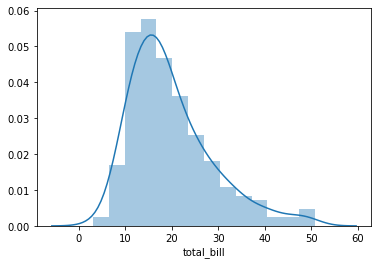

In [6]:
sns.distplot(tips['total_bill'])

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

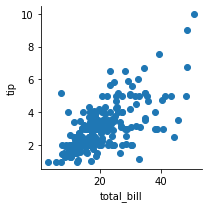

In [7]:
#Primeira solução que fiz
tt = sns.FacetGrid(tips)
tt = tt.map(plt.scatter,'total_bill','tip')

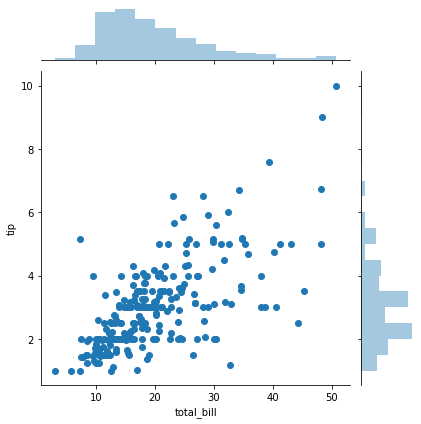

In [8]:
#Solução que vi na correção do exercício do João
sns.jointplot(x ="total_bill", y ="tip", data = tips)

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

In [ ]:
#Plotar usando o .pairplot que aceita colocar gistogramas ou estimativas de densidade de cada variável ao longo da diagonal
sns.pairplot(tips)

### Step 8. Present the relationship between days and total_bill value

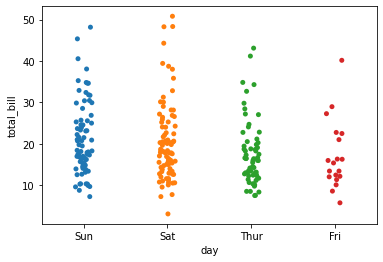

In [63]:
#Aqui, no primeiro momento pensei, assim como o João, em um gráfico de barras ou algo semelhante
#Mas depois vendo a correção vi que não era eficiente
sns.stripplot('day', 'total_bill', data = tips, jitter = True)

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

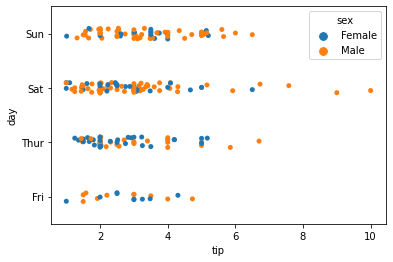

In [76]:
#Nessa questão eu primeiro em fazer alteração na coluna sex identificando por zero ou um para fazer a diferenciação
#Mas, de fato, usando o seaborn é bem menos trabalhoso hahaha
sns.stripplot(x = "tip", y = "day", hue = "sex", data = tips, jitter = True)

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

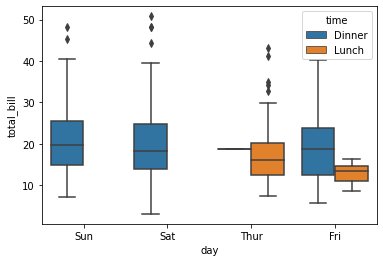

In [67]:
sns.boxplot(tips['day'], tips['total_bill'], hue = tips['time'])

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

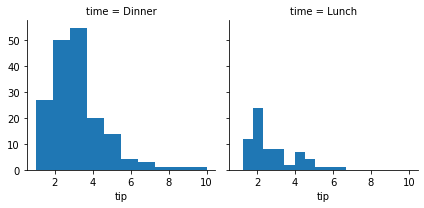

In [68]:
tdl = sns.FacetGrid(tips, col='time')
tdl = tdl.map(plt.hist,'tip')

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

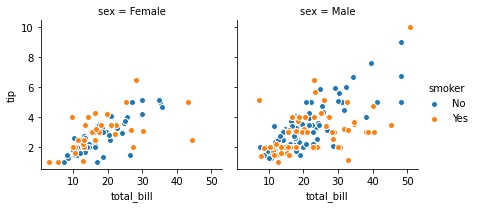

In [73]:
#Aqui foi a primeira solução que fiz
mf = sns.FacetGrid(tips, col='sex', hue = 'smoker')
mf = mf.map(plt.scatter,'total_bill' , 'tip', edgecolor='w')
mf.add_legend()

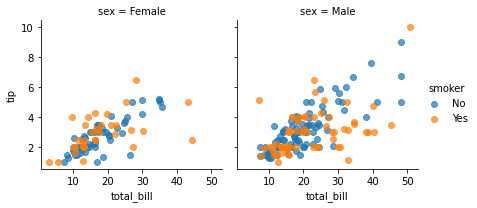

In [75]:
#Quando vi a correção foi pedido pra usar o alpha = 0.7
#Na solução acima usei o edgecolor='w'
#Minha dúvida é para quais situações devo usar cada um
mf = sns.FacetGrid(tips, col='sex', hue = 'smoker')
mf = mf.map(plt.scatter,'total_bill' , 'tip', alpha=0.7)
mf.add_legend()

### BONUS: Create your own question and answer it using a graph.

Nesse caso, eu decidi testar o "gráfico de pizza" que em nenhum momento usei antes. 
Criei dois gráficos, um com a procentagem, para cada dia, da soma das contas e outra usando a média dessas contas. 
Olhando só para esses gráficos é possível ver que o número de clientes de fato é maior no sábado e no domingo e não são os valores das contas de sobem.

In [108]:
tips_1 = tips.groupby('day').sum()
tips_2 = tips.groupby('day').mean()
tips_1
tips_2

,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105
Thur,17.682742,2.771452,2.451613


Text(0.5, 1.0, 'Soma de contas / média das contas pro dia')

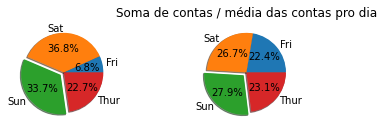

In [109]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
labels = 'Fri' , 'Sat' , 'Sun' , 'Thur'
slices = tips_1['total_bill']
slices2 = tips_2['total_bill']
explode = (0,0,0.1,0)
ax1.pie(slices, labels=labels, explode=explode, autopct='%1.1f%%',shadow=True)
ax2.pie(slices2, labels=labels, explode=explode, autopct='%1.1f%%',shadow=True)
plt.title('Soma de contas / média das contas pro dia')